**NAME:** SSEMUJJU EDIRISA <br>
**IDNO:** 151-371 <br>
**COURSE:** BCS <br>

### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [7]:
data = pd.read_csv("budget.csv")
data

,Year,Global-GDP-Index-per-Capita,Cust-Serv-Calls('000s),Employees('000),Items('000),Revenue($M)
0,1,100,25,45,11,"2,000"
1,2,112,27,53,11,"2,400"
2,3,115,22,54,12,"2,700"
3,4,123,27,58,14,"2,900"
4,5,122,32,60,14,"3,200"
5,6,132,33,65,15,"3,500"
6,7,143,40,72,16,"4,000"
7,8,126,30,65,16,"4,200"
8,9,166,34,85,17,"4,500"
9,10,157,47,97,18,"4,700"


In [8]:
data.dtypes

Year                            int64
Global-GDP-Index-per-Capita     int64
Cust-Serv-Calls('000s)          int64
Employees('000)                 int64
Items('000)                     int64
Revenue($M)                    object
dtype: object

### Cleaning data

In [9]:
data['Revenue($M)'] = data['Revenue($M)'].str.replace(',', '')  #Replacing the comma with an empty space
data['Revenue($M)'] = data['Revenue($M)'].astype(int) #Converting Revenue from string to integer

In [10]:
data.dtypes

Year                           int64
Global-GDP-Index-per-Capita    int64
Cust-Serv-Calls('000s)         int64
Employees('000)                int64
Items('000)                    int64
Revenue($M)                    int32
dtype: object

In [11]:
data

,Year,Global-GDP-Index-per-Capita,Cust-Serv-Calls('000s),Employees('000),Items('000),Revenue($M)
0,1,100,25,45,11,2000
1,2,112,27,53,11,2400
2,3,115,22,54,12,2700
3,4,123,27,58,14,2900
4,5,122,32,60,14,3200
5,6,132,33,65,15,3500
6,7,143,40,72,16,4000
7,8,126,30,65,16,4200
8,9,166,34,85,17,4500
9,10,157,47,97,18,4700


# <span style="color:blue">Question one (Simple Linear Regression)</span>

#### (a)Determining Strong Relationship to the Dependant variable

In [12]:
data.corr()

,Year,Global-GDP-Index-per-Capita,Cust-Serv-Calls('000s),Employees('000),Items('000),Revenue($M)
Year,1.000000,0.948090,0.791204,0.959299,0.986972,0.994107
Global-GDP-Index-per-Capita,0.948090,1.000000,0.751039,0.973485,0.937165,0.935971
Cust-Serv-Calls('000s),0.791204,0.751039,1.000000,0.818930,0.832001,0.786388
Employees('000),0.959299,0.973485,0.818930,1.000000,0.943514,0.946393
Items('000),0.986972,0.937165,0.832001,0.943514,1.000000,0.976961
Revenue($M),0.994107,0.935971,0.786388,0.946393,0.976961,1.000000


Printing variables that are strongly related to revenue

In [13]:
correlation = data.corr()['Revenue($M)'].sort_values(ascending=False)
strongly_related_variables = correlation[correlation > 0.9].index.tolist() # Considering above 0.9
print("Variables strongly related to Revenue($M):", strongly_related_variables)

Variables strongly related to Revenue($M): ['Revenue($M)', 'Year', "Items('000)", "Employees('000)", 'Global-GDP-Index-per-Capita']


### (b) Simple linear Regression

In [14]:
X=data[["Year"]] # Independent Variable
y=data[["Revenue($M)"]] # Dependenet Variable

#Creating a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y) 

LinearRegression()

### (i)Graphical Representation

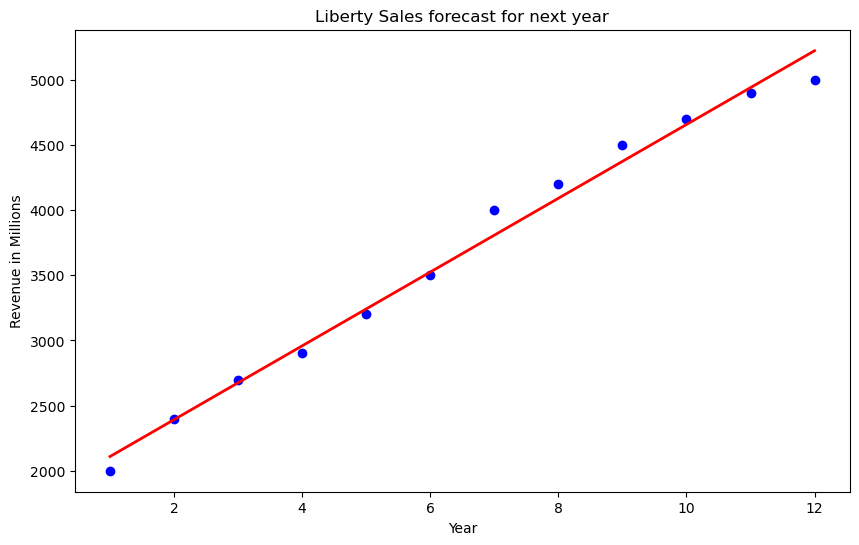

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
#Scatter plot of the data
plt.scatter(X, y, color = "blue",)
#Regression line
plt.plot(X, model.predict(X), color ='red', linewidth = 2,)
plt.title("Liberty Sales forecast for next year")
plt.xlabel("Year")
plt.ylabel("Revenue in Millions")
plt.show()

### (ii)Intercept

In [16]:
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: [1825.75757576]


### (iii)Coefficient

In [17]:
coefficient = model.coef_
print("Coefficient:", coefficient)

Coefficient: [[283.21678322]]


### (iv)Formulating the model relationship

In [18]:
model_relationship = f"y = {coefficient}x + {intercept}" #Following y = mx + C where m is coefficient and C is intercept
print(model_relationship)

y = [[283.21678322]]x + [1825.75757576]


# <span style="color:blue">Question two (Multiple Linear Regression)</span>

 Defining Dependent and independent Variables

In [19]:
P = data.drop(columns=["Revenue($M)","Cust-Serv-Calls('000s)"],axis = 1).values  # Independent variables
Q = data['Revenue($M)'].values  # Dependent variable

##### Multiple Linear regression

In [20]:
multmodel = LinearRegression()
multmodel.fit(P,Q)

LinearRegression()

### (a) Graphical Representation

##### Using Scatter Graph

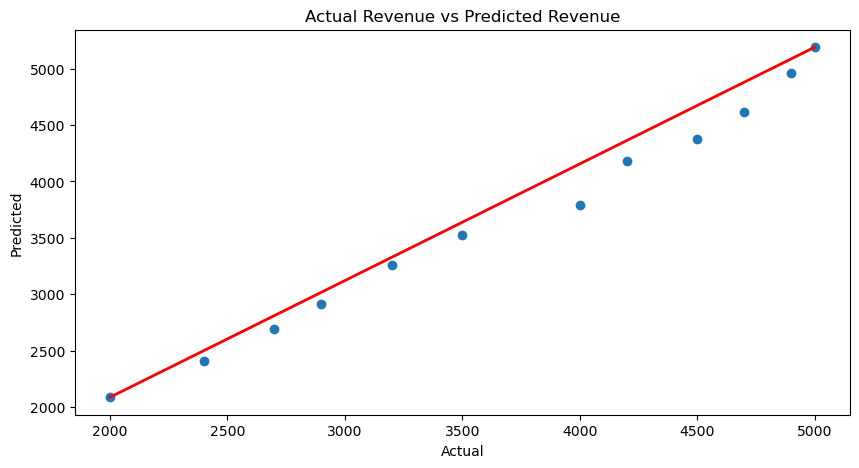

In [23]:
predicted_values = multmodel.predict(P)
plt.figure(figsize=(10,5))
plt.scatter(Q, predicted_values)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual Revenue vs Predicted Revenue")

#Regression line
plt.plot([min(Q), max(Q)], [min(predicted_values), max(predicted_values)], color='red', linestyle='-', linewidth=2)

plt.show()

#### Using the Kernel Density Estimates (KDE)

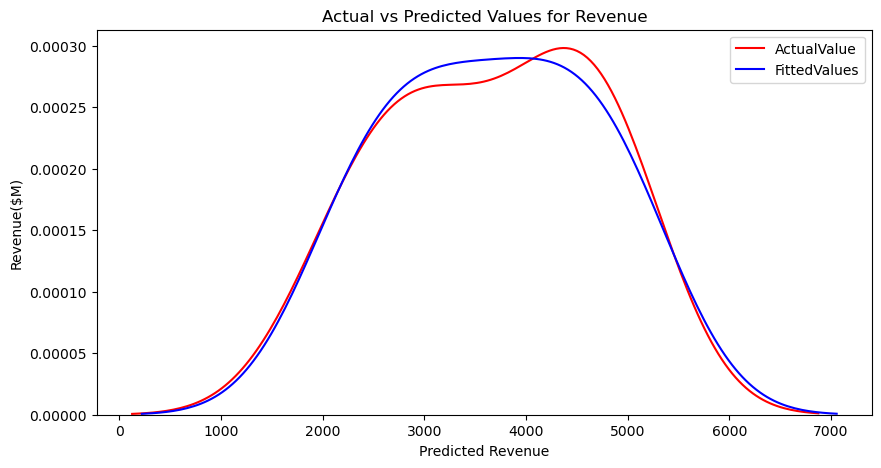

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

ax1 = sns.kdeplot(data['Revenue($M)'], color='r', label ='ActualValue') #Actual values
sns.kdeplot(predicted_values, color="b", label ='FittedValues', ax=ax1) # predicted value

plt.title('Actual vs Predicted Values for Revenue')
plt.xlabel('Predicted Revenue')
plt.ylabel("Revenue($M)")
plt.legend(loc = "lower right")
plt.legend()
plt.show()

### (b) Intercept

In [215]:
intercept = multmodel.intercept_
print("Intercept:", intercept)

Intercept: 3081.1276982605154


### (C) Coeffficients

In [216]:
Coefficient = multmodel.coef_
print("Coefficients:",Coefficient)

Coefficients: [ 414.38132889    4.16738431   12.59807861  -14.07015872 -138.28714695]


### (d) Modeling the relationship

In [226]:
model_relationship = f"Y = {intercept}"
for i, var in enumerate(strongly_related_variables):
    model_relationship += f" + {Coefficient[i]}*{var}"

print("Model Relationship:", model_relationship)

Model Relationship: Y = 3081.1276982605154 + 414.3813288933146*Revenue($M) + 4.167384314678689*Year + 12.598078611490536*Items('000) + -14.070158716704077*Employees('000) + -138.28714695363084*Global-GDP-Index-per-Capita
